In [1]:
import xlrd
import librosa
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from scipy.io import loadmat

file = 'final_main.mat'
final_main = loadmat(file)


#### data

In [2]:

for key in final_main:
    print(key)
    

__header__
__version__
__globals__
S_left
S_left_phase
S_right
S_right_phase
idx_drone_end


In [3]:

S_left  = final_main['S_left']
S_right = final_main['S_right']
S_left_phase  = final_main['S_left_phase']
S_right_phase = final_main['S_right_phase']


#### label

In [4]:
df = pd.read_excel('contest_labeling_취합.xlsx')

df.head()

,FileName,JudgingPerson,Angle,Angle.1,Angle.2,Angle.3,Angle.4,Media,Unnamed: 8,평가 사람
0,t3_audio_00000.wav,1,40,40,60,60,80.0,60,60,다니엘
1,t3_audio_00001.wav,1,0,0,0,40,20.0,0,0,오상현
2,t3_audio_00002.wav,1,90,140,-1,120,120.0,120,120,김태수
3,t3_audio_00003.wav,1,-1,-1,-1,140,120.0,-1,-1,kriss
4,t3_audio_00004.wav,1,120,120,100,160,120.0,120,120,충원


In [5]:
df['Media']

0       60
1        0
2      120
3       -1
4      120
      ... 
495    100
496     -1
497     60
498     20
499    120
Name: Media, Length: 500, dtype: int64

In [6]:
label = list( angle for angle in df['Media'])

label = np.asarray(label) 

<IPython.core.display.Javascript object>


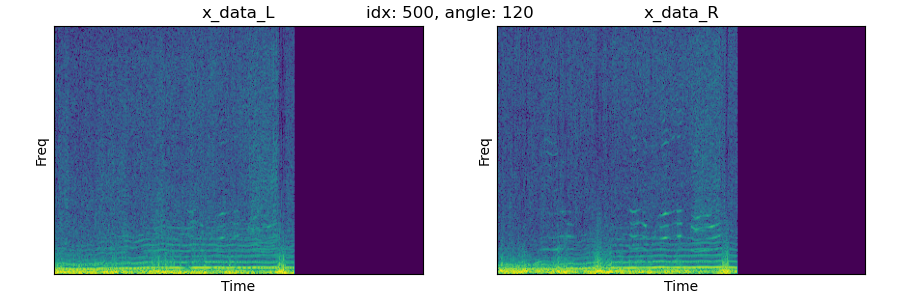

In [7]:
%matplotlib notebook
idx = 500


x0 = librosa.amplitude_to_db(S_left[:,:,idx-1])
x1 = librosa.amplitude_to_db(S_right[:,:,idx-1])


x = [x0, x1]
title=['x_data_L', 'x_data_R']


fig = plt.figure(figsize=(9,3))
fig.suptitle("idx: {}, angle: {}".format(idx, label[idx-1]))
row, col = 1,2

for i,mag in enumerate(x):
    ax = fig.add_subplot(row, col, i+1)
    im = ax.imshow(mag, origin='lower')
    ax.set_title(title[i])
    ax.set_xlabel('Time')
    ax.set_ylabel('Freq')
    ax.set_xticks([]), ax.set_yticks([])

plt.tight_layout()
plt.show()

In [8]:
np.save('S_left.npy', S_left)
np.save('S_right.npy', S_right)
np.save('S_left_phase.npy', S_left_phase)
np.save('S_right_phase.npy', S_right_phase)
np.save('label.npy', label)